In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

The following ML algorithms will be used to better analyze the performances of each of them on an imbalanced dataset
1) Logistic Regression
2) Naive Bayes algorithm
3) Random Forrest
4) XGBoost 
5) Penalized-SVM 

This ipynb file will be used to train and save the models to be used later in the prediction ipynb

In [4]:
train_data = pd.read_csv('../Data/data-created/train_data_preprocessed.csv')

In [5]:
train_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,income_slab
0,-0.357282,0.109064,-1.175573,-0.120165,-0.885275,-1.046681,1.237338,-1.381823,-0.981828,-0.463611,-0.193477,0,-0.007246
1,-1.468799,-2.200374,0.920052,0.179146,0.848642,-0.187122,-2.411624,0.490766,-0.876088,-0.463611,-0.193477,1,-1.225624
2,-0.357282,0.032477,-1.175573,1.675700,0.270669,-0.187122,1.237338,0.587793,1.450183,-0.463611,-1.395338,0,-0.007246
3,0.365197,-2.343024,0.221510,-0.120165,0.270669,0.672438,-0.555679,0.962819,1.450183,-0.463611,1.008383,1,-1.225624
4,-0.357282,-0.088000,-1.175573,-0.718787,1.426614,-1.046681,0.512819,-0.991957,0.392787,-0.463611,-1.395338,0,-0.007246


In [8]:
X_train = train_data.drop(['loan_status'],axis=1)
y_train = train_data.loan_status

In [11]:
X_train.shape, y_train.shape

((26064, 12), (26064,))

In [30]:
def metrics(matrix):
    TN = matrix[0,0]
    TP = matrix[1,1]
    FP = matrix[0,1]
    FN = matrix[1,0]
    recall = TP/(TP + FN)
    precision = TP/(TP + FP)
    f1_score = 2*recall*precision/(recall+precision)
    return [recall,precision,f1_score]

##### 1) Logisic Regression

In [7]:
Logistic_model = LogisticRegression()

In [18]:
Logistic_model.fit(X_train,y_train)

LogisticRegression()

In [19]:
X_train_pred = Logistic_model.predict(X_train)

In [23]:
confusionMatrx = confusion_matrix(y_train,X_train_pred)
print(confusionMatrx)

[[19341  1037]
 [ 3128  2558]]


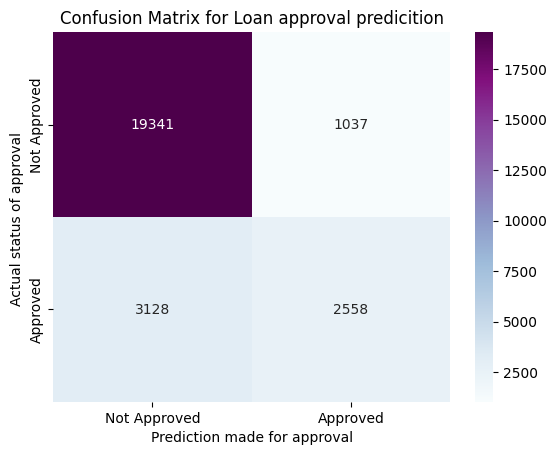

In [28]:
ax = sns.heatmap(confusionMatrx, annot=True, cmap='BuPu',fmt='g')
ax.set_title('Confusion Matrix for Loan approval predicition');
ax.set_xlabel('Prediction made for approval')
ax.set_ylabel('Actual status of approval ')
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Approved','Approved'])
ax.yaxis.set_ticklabels(['Not Approved','Approved'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [31]:
logistic_metrics = metrics(confusionMatrx)

In [32]:
logistic_metrics

[0.44987689060851216, 0.7115438108484006, 0.5512337032647344]

In [35]:
filename = open('../models/logistic_regression','wb')
pickle.dump(Logistic_model, filename)